# Importing libraries

In [1]:
#importing necessary libraries
# General

import numpy as np
import pandas as pd
import re
import os
import pickle

# EDA

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

# NLP 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize 

# ML
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Reading Data

In [2]:
sms=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding = 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='v1', ylabel='count'>

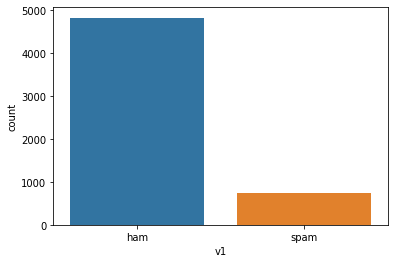

In [3]:
#analyzing dependent variables
sns.countplot(sms['v1'])

# Exploratory Data Analysis

In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
#checking for null values
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#dropping the column with more null values
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
#renaming the columns
sms=sms.rename({'v1':'label','v2':'text'},axis=1)
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Distribution based on length of words

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

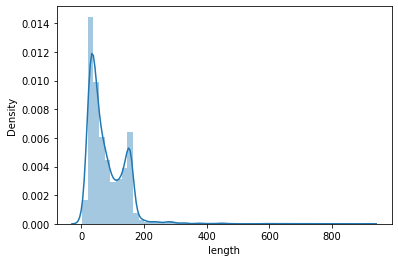

In [9]:
#analyzing text
sms['length']=sms['text'].apply(lambda x: len(x))
sns.distplot(sms['length'], kde=True)

<AxesSubplot:xlabel='label', ylabel='length'>

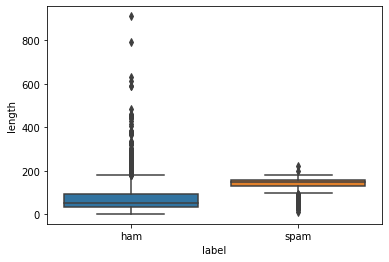

In [10]:
sns.boxplot(y='length', x='label', data=sms)

# Data Preprocessing

In [11]:
corpus = []
ps = PorterStemmer()

for i in range(len(sms)):
    msg = re.sub('[^a-zA-Z]', ' ', sms['text'][i]) #removing non alphabetics
    msg = msg.lower()#lowering the case
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

In [12]:
#adding new column
sms['corpus'] = corpus
sms.head()

,label,text,length,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


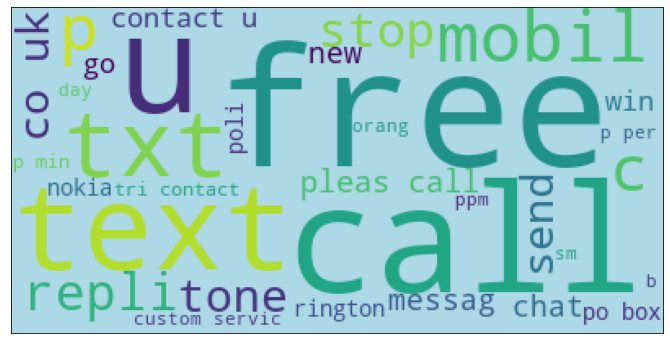

In [13]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'lightblue')
spam_wc = wc.generate(sms[sms['label'] == 'spam']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc)

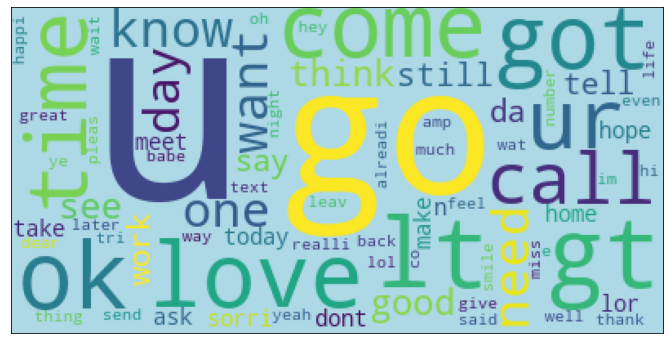

In [14]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'lightblue')
ham_wc = wc.generate(sms[sms['label'] == 'ham']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(ham_wc);

In [15]:
#transform the values of the output variable into 0 and 1
sms['Temp'] = sms['label'].map({'ham': 0, 'spam': 1})

In [16]:
#split the data into train and test sets
X=sms['corpus']
y=sms['Temp']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Pipeline 

TF-IDF - normalizing and weighting with diminishing importance tokens that occur in the majority of documents.


1.TF(Term frequency)-Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency


2.IDF (inverse document frequency)-Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus.

In [17]:
def model(model_name,X_train,y_train,X_test,y_test):
    pipeline=Pipeline([
    ('tfidf', TfidfVectorizer()),#transform the texts into the vectorized input variables X
    ('model', model_name),
    ])
    pipeline.fit(X_train,y_train)

    preds=pipeline.predict(X_test)

    print (classification_report(y_test,preds))
    print (confusion_matrix(y_test,preds))
    print('Accuracy:', pipeline.score(X_test, y_test)*100)
    print("Training Score:",pipeline.score(X_train,y_train)*100)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test,preds)
    return score
    


# MultinomialNB 

In [18]:
mnb=model(MultinomialNB(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[965   0]
 [ 37 113]]
Accuracy: 96.68161434977578
Training Score: 98.07045097599281


# RF

In [19]:
rf=model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[964   1]
 [ 24 126]]
Accuracy: 97.75784753363229
Training Score: 100.0


# XGBoost

In [20]:
xgb=model(XGBClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[962   3]
 [ 22 128]]
Accuracy: 97.75784753363229
Training Score: 99.32690150325331


# SVM

In [21]:
svc=model(SVC(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[964   1]
 [ 21 129]]
Accuracy: 98.02690582959642
Training Score: 99.77563383441776


# Model Comparison 

,Model,Accuracy_score
3,SVM,0.980269
1,RF,0.977578
2,XGBoost,0.977578
0,MNB,0.966816


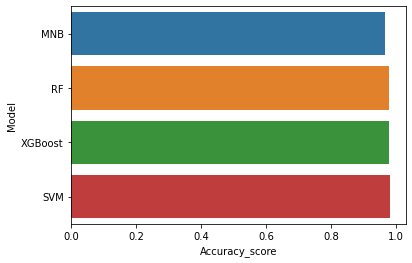

In [22]:
models = pd.DataFrame({
    'Model':['MNB','RF','XGBoost', 'SVM'],
    'Accuracy_score' :[mnb ,rf, xgb, svc]
})
sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)